In [1]:
import json
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import font_manager

C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\2538490419.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
with open("./data/mobiles/fullspecs/models_fixed.json") as f:
    data = json.load(f)

with open("./data_indi/mobiles/fullspecs/models_fixed.json", encoding='UTF-8') as f:
    data_indi = json.load(f)

with open("./data_tamil/mobiles/fullspecs/models_fixed.json", encoding='UTF-8') as f:
    data_tamil = json.load(f)

In [4]:
df_all = pd.DataFrame(data)
df_indi = pd.DataFrame(data_indi)
df_tamil = pd.DataFrame(data_tamil)

In [5]:
freq_all = {}
freq_hindi = {}
freq_tamil = {}

freq_all_full = {}
freq_hindi_full = {}
freq_tamil_full = {}

In [6]:
def calculate_freq(_json, freq, _k):
    for item in _json:
        keys = _json[item][_k]
        for key in keys:
            main = key
            subkey = _json[item][_k][key]['Description']
            for sub in subkey:
                sec = sub
                full = main + "-" + sec
                if full in freq:
                    freq[full] += 1
                else:
                    freq[full] = 1
            

In [7]:
calculate_freq(data, freq_all, 'keys')
calculate_freq(data_indi, freq_hindi, 'keys')
calculate_freq(data_tamil, freq_tamil, 'keys')

In [8]:
Df_all = pd.DataFrame(list(freq_all.items()), columns=['Feature', 'Frequency'])
Df_hindi = pd.DataFrame(list(freq_hindi.items()), columns=['Feature', 'Frequency'])
Df_tamil = pd.DataFrame(list(freq_tamil.items()), columns=['Feature', 'Frequency'])

Df_all = Df_all.sort_values(by='Frequency', ascending=False)
Df_hindi = Df_hindi.sort_values(by='Frequency', ascending=False)
Df_tamil = Df_tamil.sort_values(by='Frequency', ascending=False)

In [9]:
len_data = len(data)
len_hindi = len(data_indi)
len_tamil = len(data_tamil)
print(len_data, len_hindi, len_tamil)

12555 7277 7285


In [10]:
Df_all['Frequency %'] = (Df_all['Frequency'] / len_data) * 100
Df_hindi['Frequency %'] = (Df_hindi['Frequency'] / len_hindi) * 100
Df_tamil['Frequency %'] = (Df_tamil['Frequency'] / len_tamil) * 100

In [11]:
calculate_freq(data, freq_all_full, 'specs')
calculate_freq(data_indi, freq_hindi_full, 'specs')
calculate_freq(data_tamil, freq_tamil_full, 'specs')

In [12]:
Df_all_full = pd.DataFrame(list(freq_all_full.items()), columns=['Feature', 'Frequency'])
Df_hindi_full = pd.DataFrame(list(freq_hindi_full.items()), columns=['Feature', 'Frequency'])
Df_tamil_full = pd.DataFrame(list(freq_tamil_full.items()), columns=['Feature', 'Frequency'])

Df_all_full = Df_all_full.sort_values(by='Frequency', ascending=False)
Df_hindi_full = Df_hindi_full.sort_values(by='Frequency', ascending=False)
Df_tamil_full = Df_tamil_full.sort_values(by='Frequency', ascending=False)

In [13]:
Df_all_full['Frequency %'] = (Df_all_full['Frequency'] / len_data) * 100
Df_hindi_full['Frequency %'] = (Df_hindi_full['Frequency'] / len_hindi) * 100
Df_tamil_full['Frequency %'] = (Df_tamil_full['Frequency'] / len_tamil) * 100

In [14]:
def ploting(Df, x, title, _Font, siz):    
    fig, ax = plt.subplots(figsize=(10, siz))  # Adjust the figsize parameter to make the figure taller

    ax.barh(Df['Feature'], Df[x], edgecolor='none', height=0.8)  # Adjust the height parameter

    ax.set_xlabel(x)
    ax.set_ylabel('Feature')
    ax.set_title(title)

    # Change font to support Hindi characters
    fprop = font_manager.FontProperties(fname=f'C:\\Users\\lagg1\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data/fonts/ttf\{_Font}.ttf')
    plt.yticks(Df['Feature'], fontproperties=fprop)

    # Add labels and tags
    for i, v in enumerate(Df[x]):
        ax.text(v, i, str(v), color='blue', fontweight='bold', va='center')

    plt.tight_layout()  # Adjust the spacing between subplots

    return fig, ax


C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots


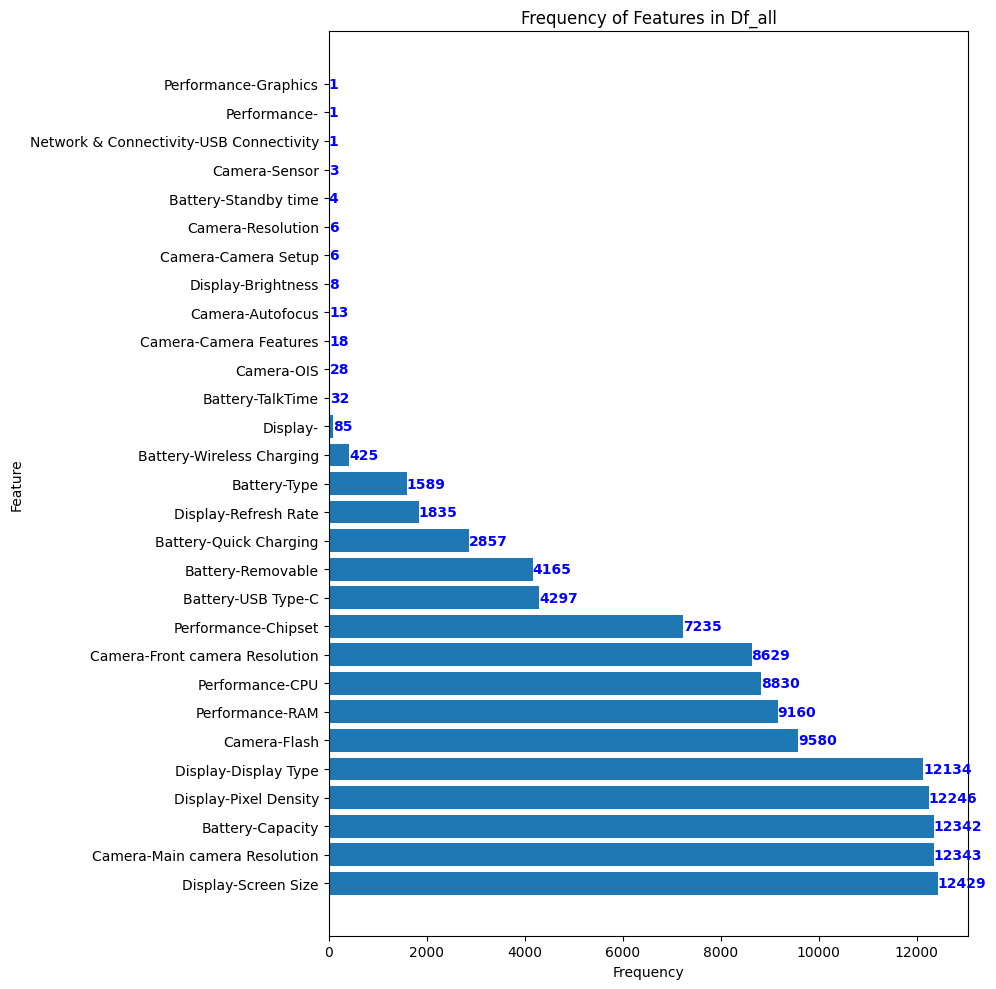

C:\Users\lagg1\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lagg1\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


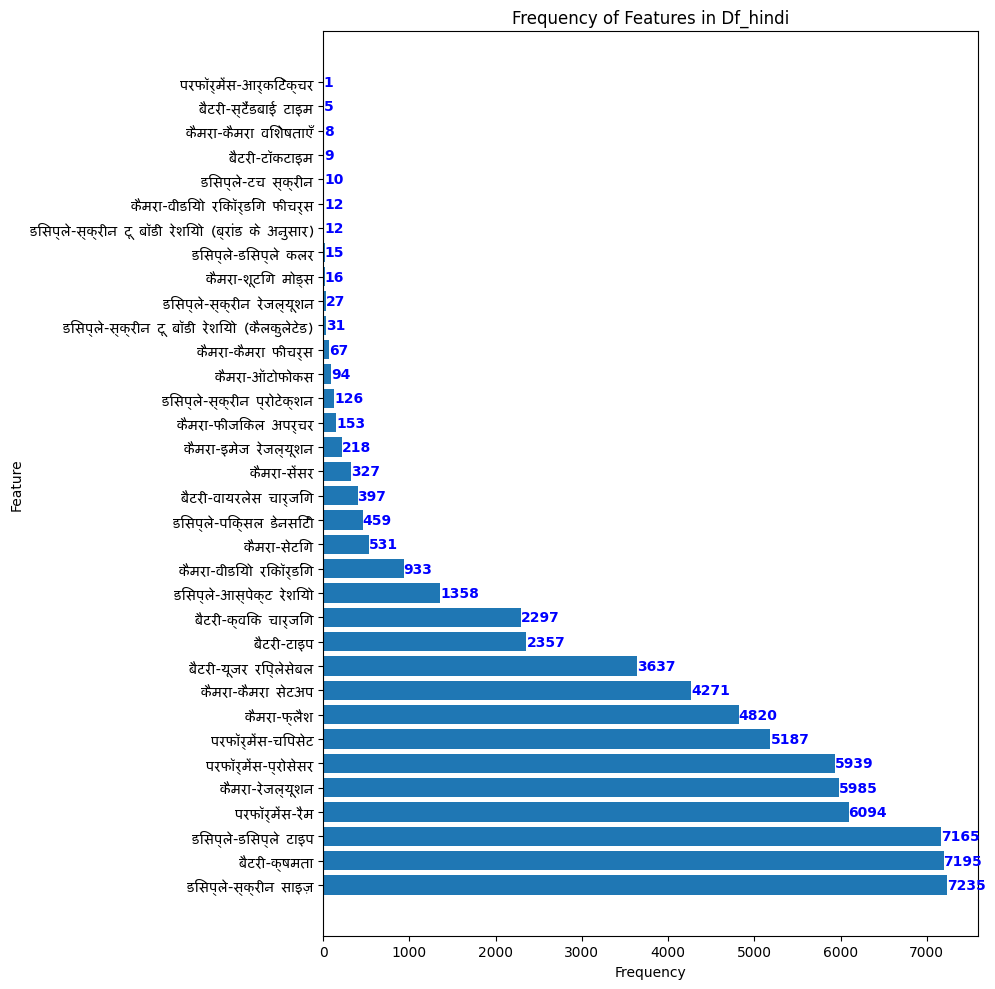

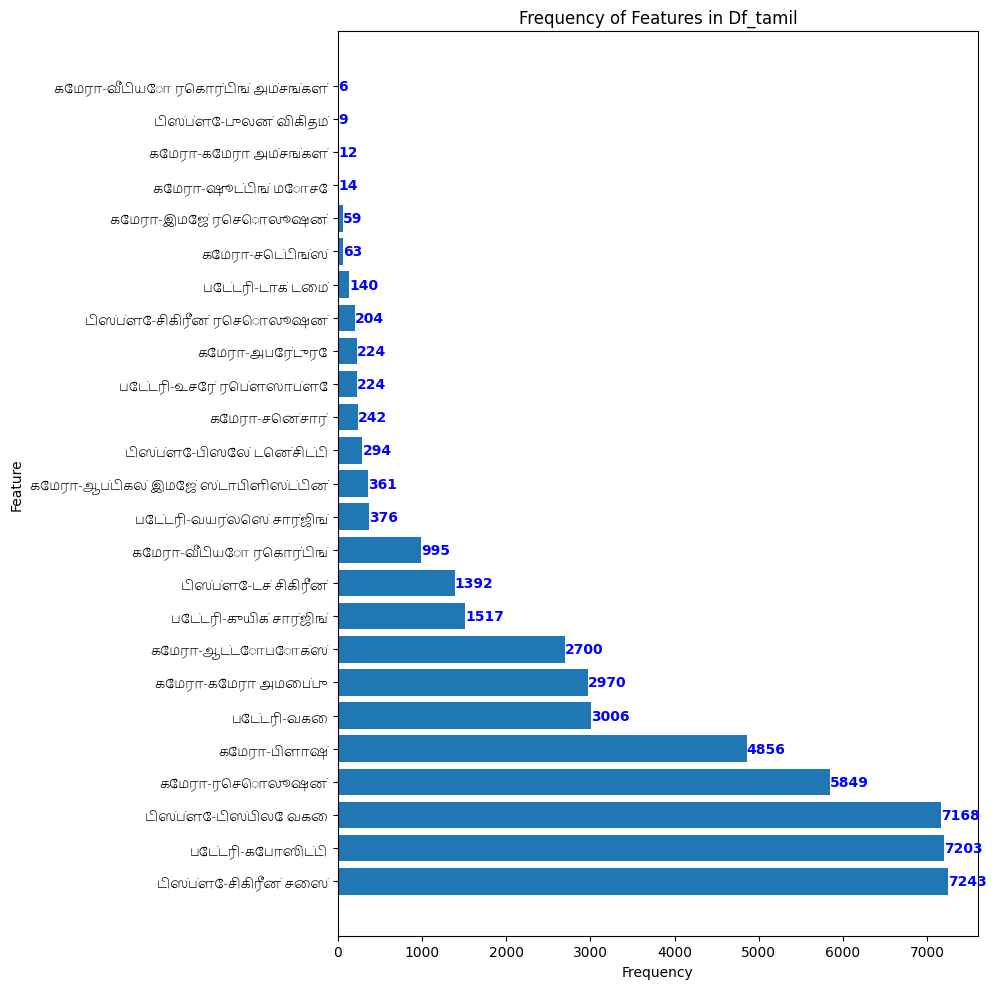

In [15]:
x = "Frequency"
plt_all = ploting(Df_all, x, 'Frequency of Features in Df_all', _Font = 'DejaVuSans', siz=10)
plt_hindi = ploting(Df_hindi, x, 'Frequency of Features in Df_hindi', _Font = 'Mangal', siz=10)
plt_tamil = ploting(Df_tamil, x, 'Frequency of Features in Df_tamil', _Font = 'Catamaran', siz=10)

C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots


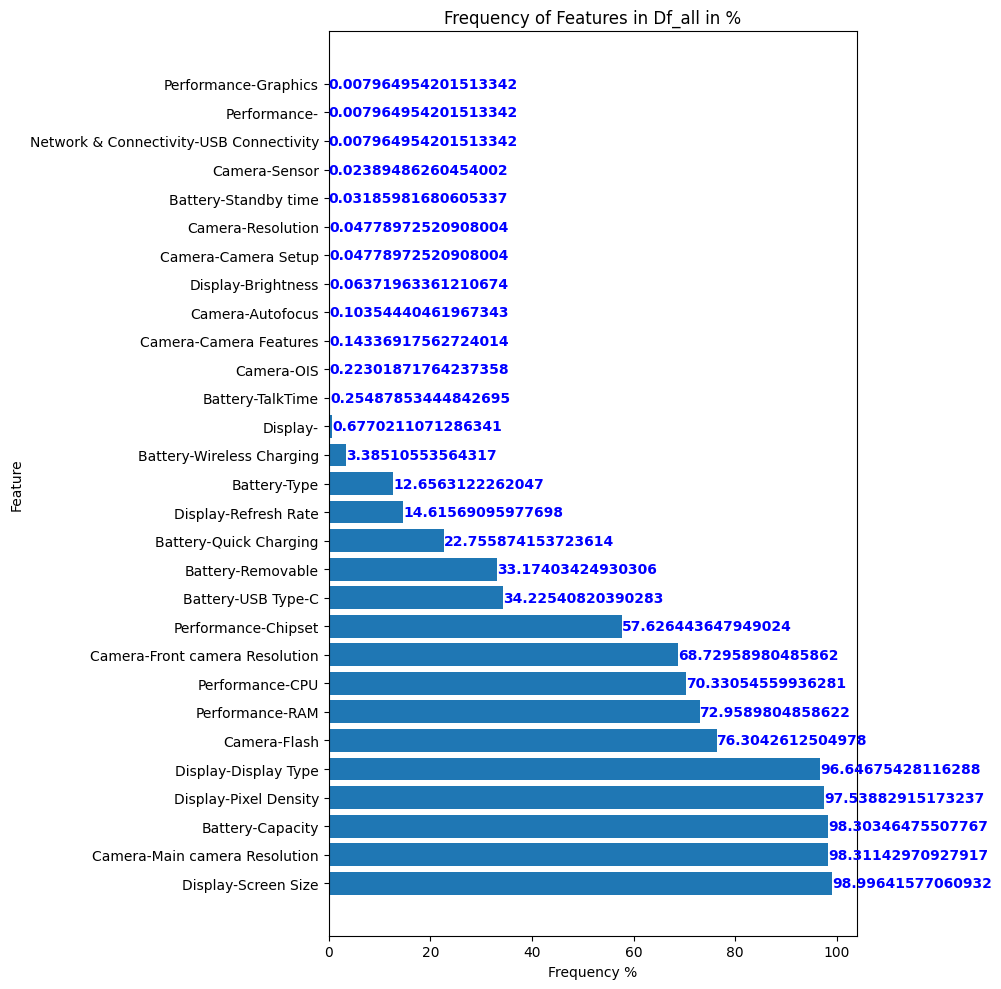

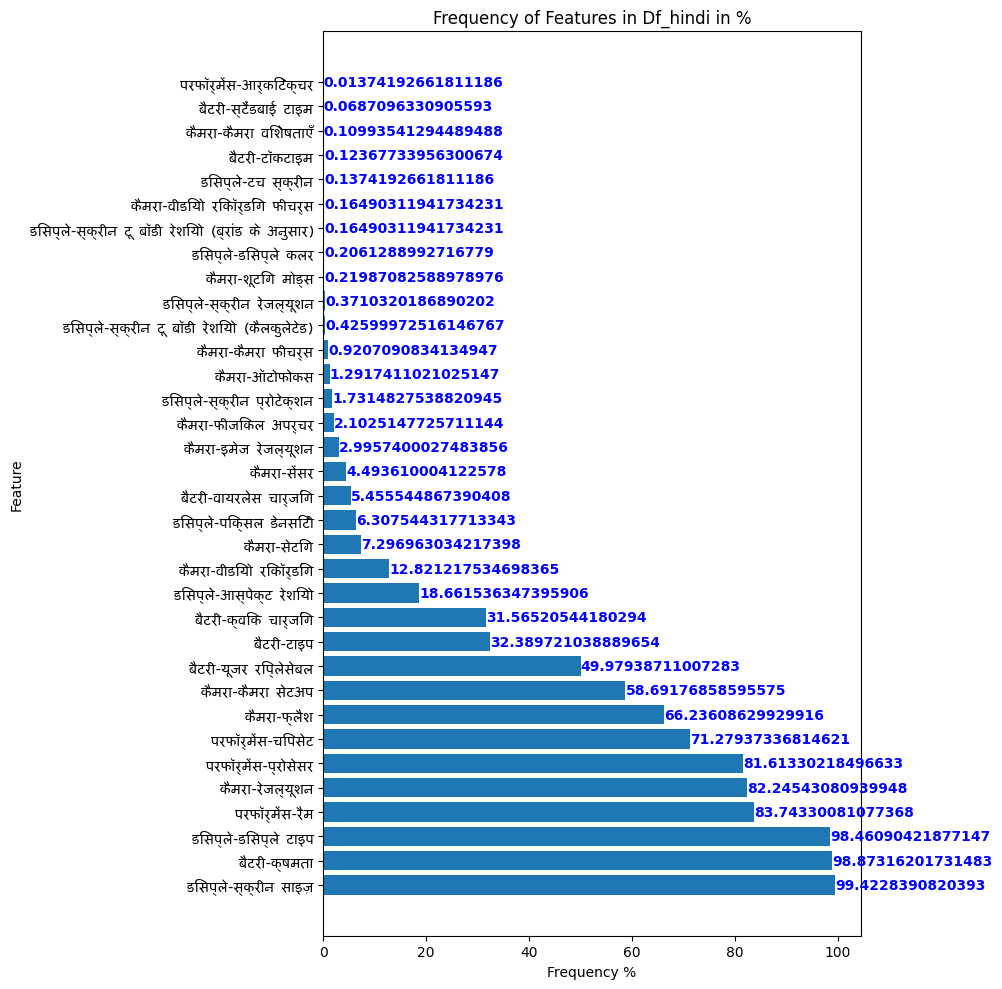

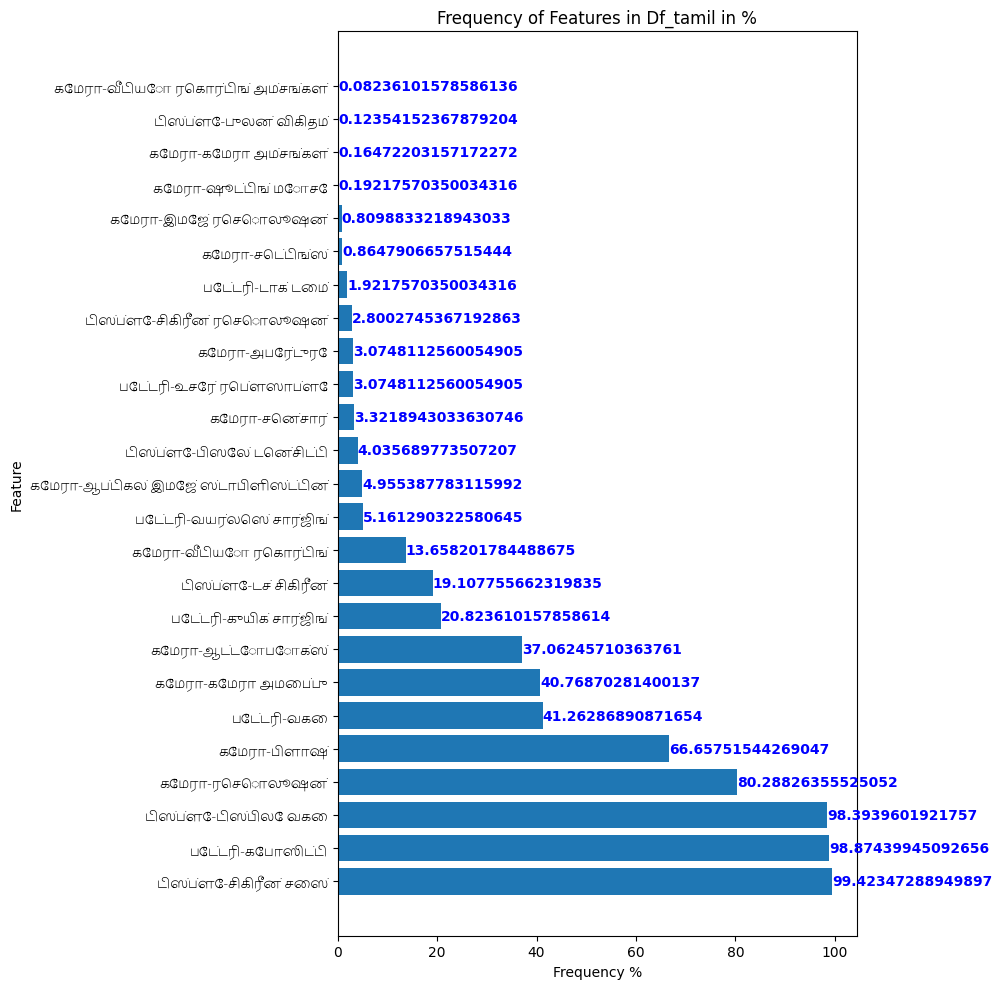

In [16]:
x = "Frequency %"
plt_all_freq = ploting(Df_all, x, 'Frequency of Features in Df_all in %', _Font = 'DejaVuSans', siz=10)
plt_hindi_freq = ploting(Df_hindi, x, 'Frequency of Features in Df_hindi in %', _Font = 'Mangal', siz=10)
plt_tamil_freq = ploting(Df_tamil, x, 'Frequency of Features in Df_tamil in %', _Font = 'Catamaran', siz=10)

C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 77 (M) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 72 (H) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 76 (L) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots
C:\Users\lagg1\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: User

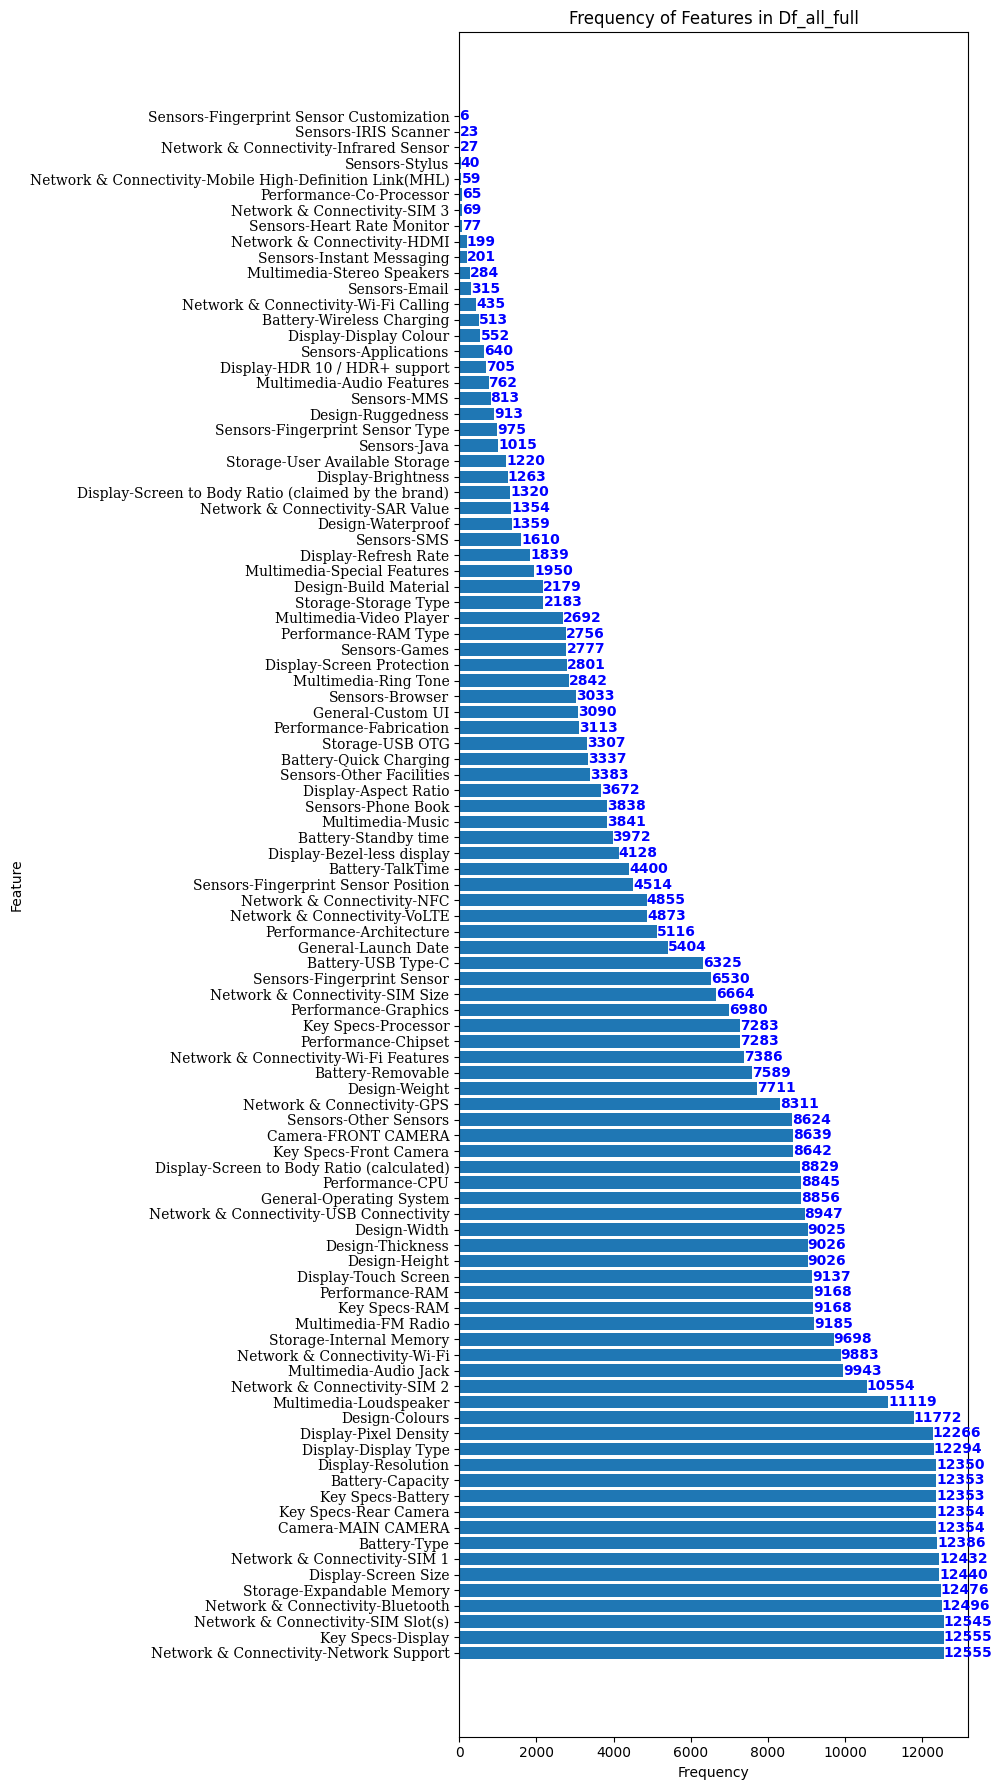

C:\Users\lagg1\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 77 (M) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lagg1\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 72 (H) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lagg1\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 76 (L) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


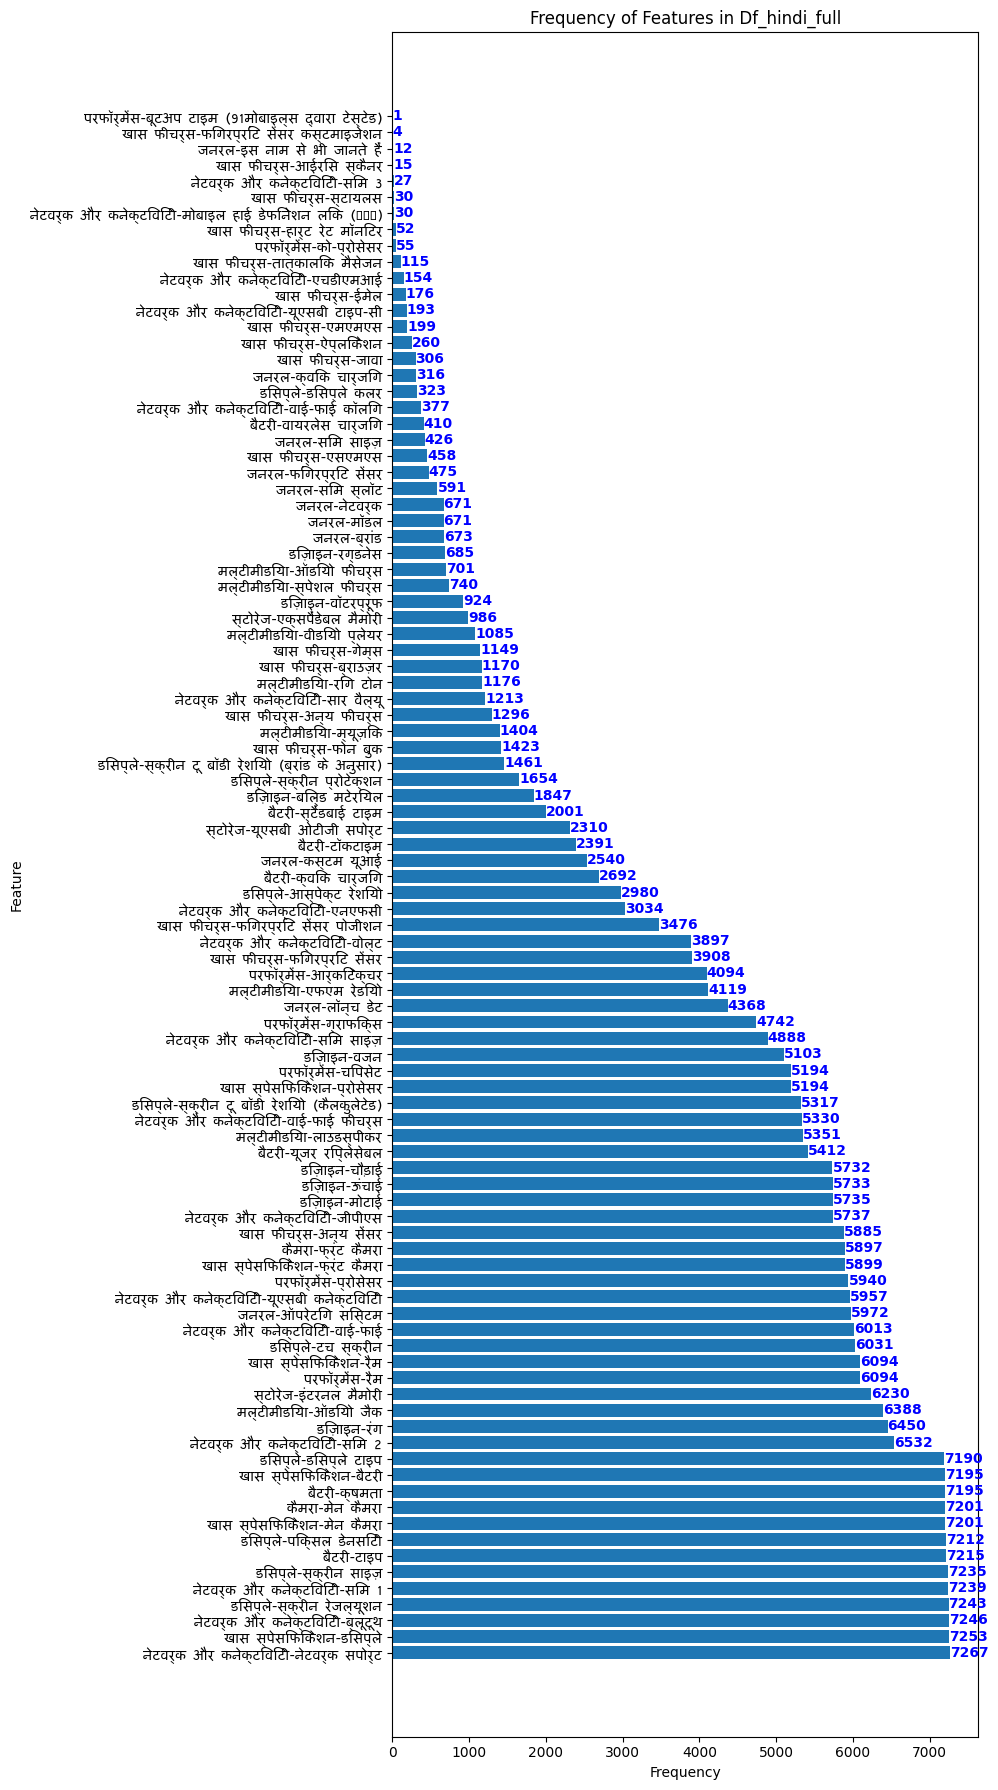

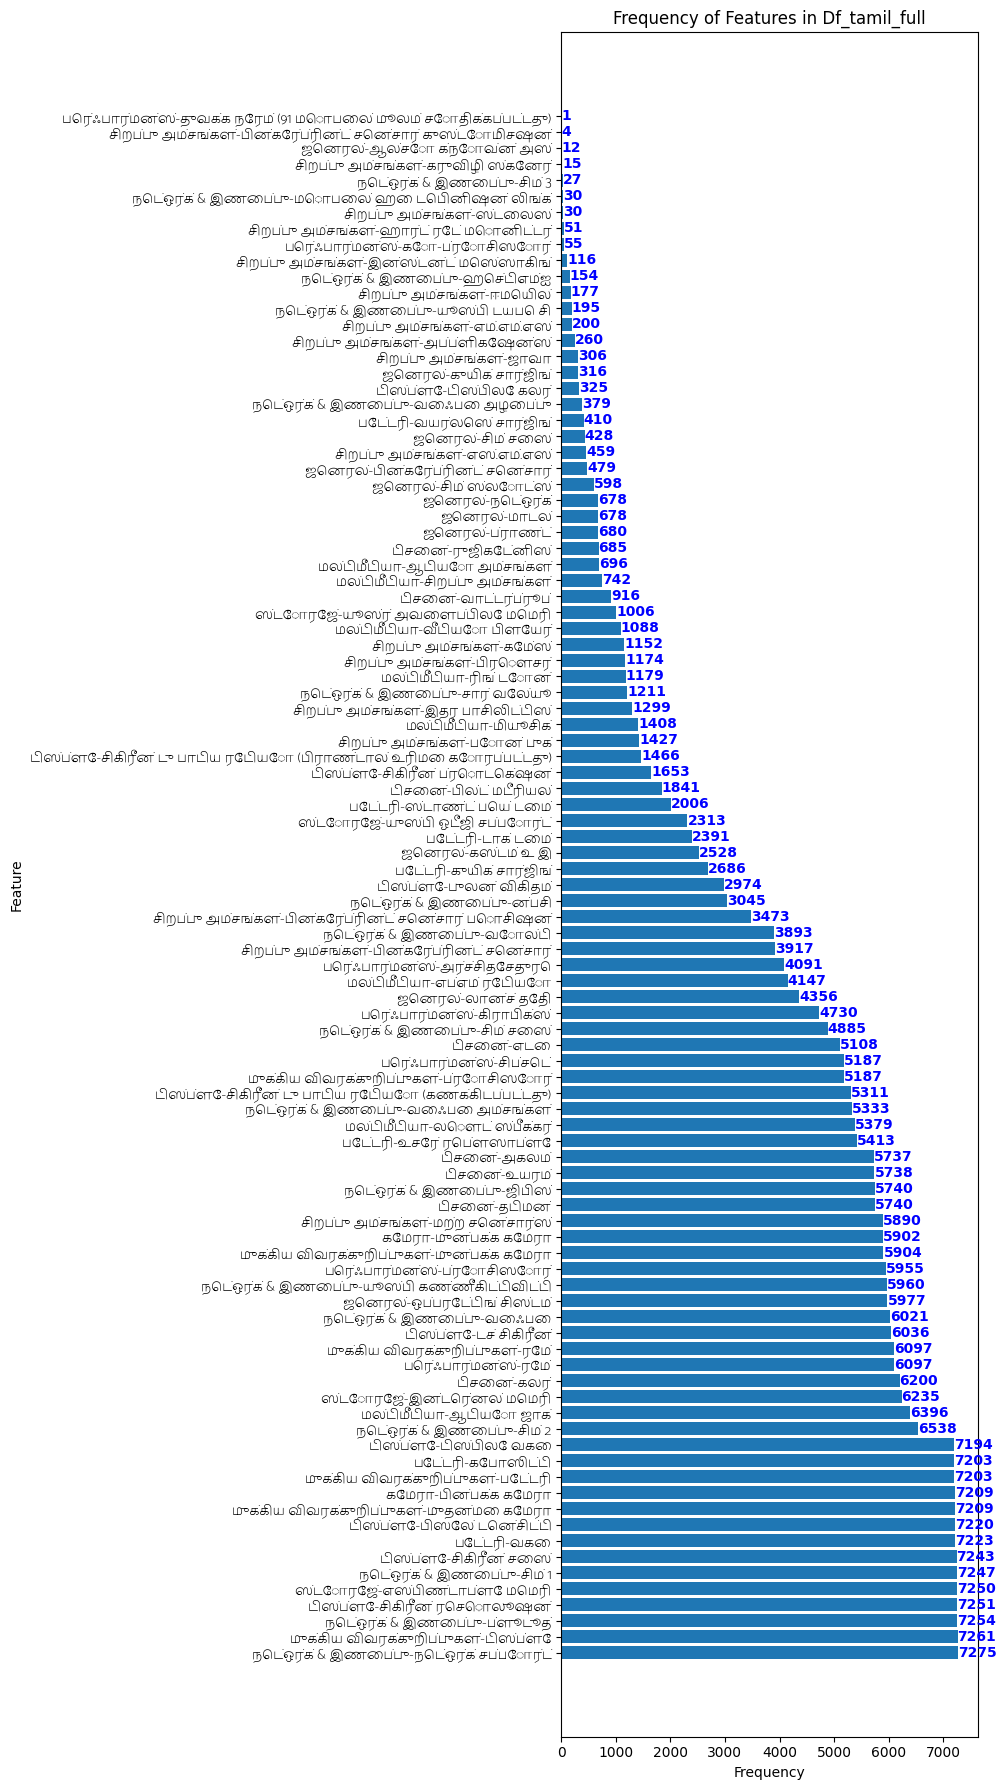

In [17]:
x = "Frequency"
siz = 18
plt_all_tot = ploting(Df_all_full, x, 'Frequency of Features in Df_all_full', _Font = 'DejaVuSerif', siz=siz)
plt_hindi_tot = ploting(Df_hindi_full, x, 'Frequency of Features in Df_hindi_full', _Font = 'Mangal', siz=siz)
plt_tamil_tot = ploting(Df_tamil_full, x, 'Frequency of Features in Df_tamil_full', _Font = 'Catamaran', siz=siz)

C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 77 (M) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 72 (H) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\1362522440.py:18: UserWarning: Glyph 76 (L) missing from current font.
  plt.tight_layout()  # Adjust the spacing between subplots


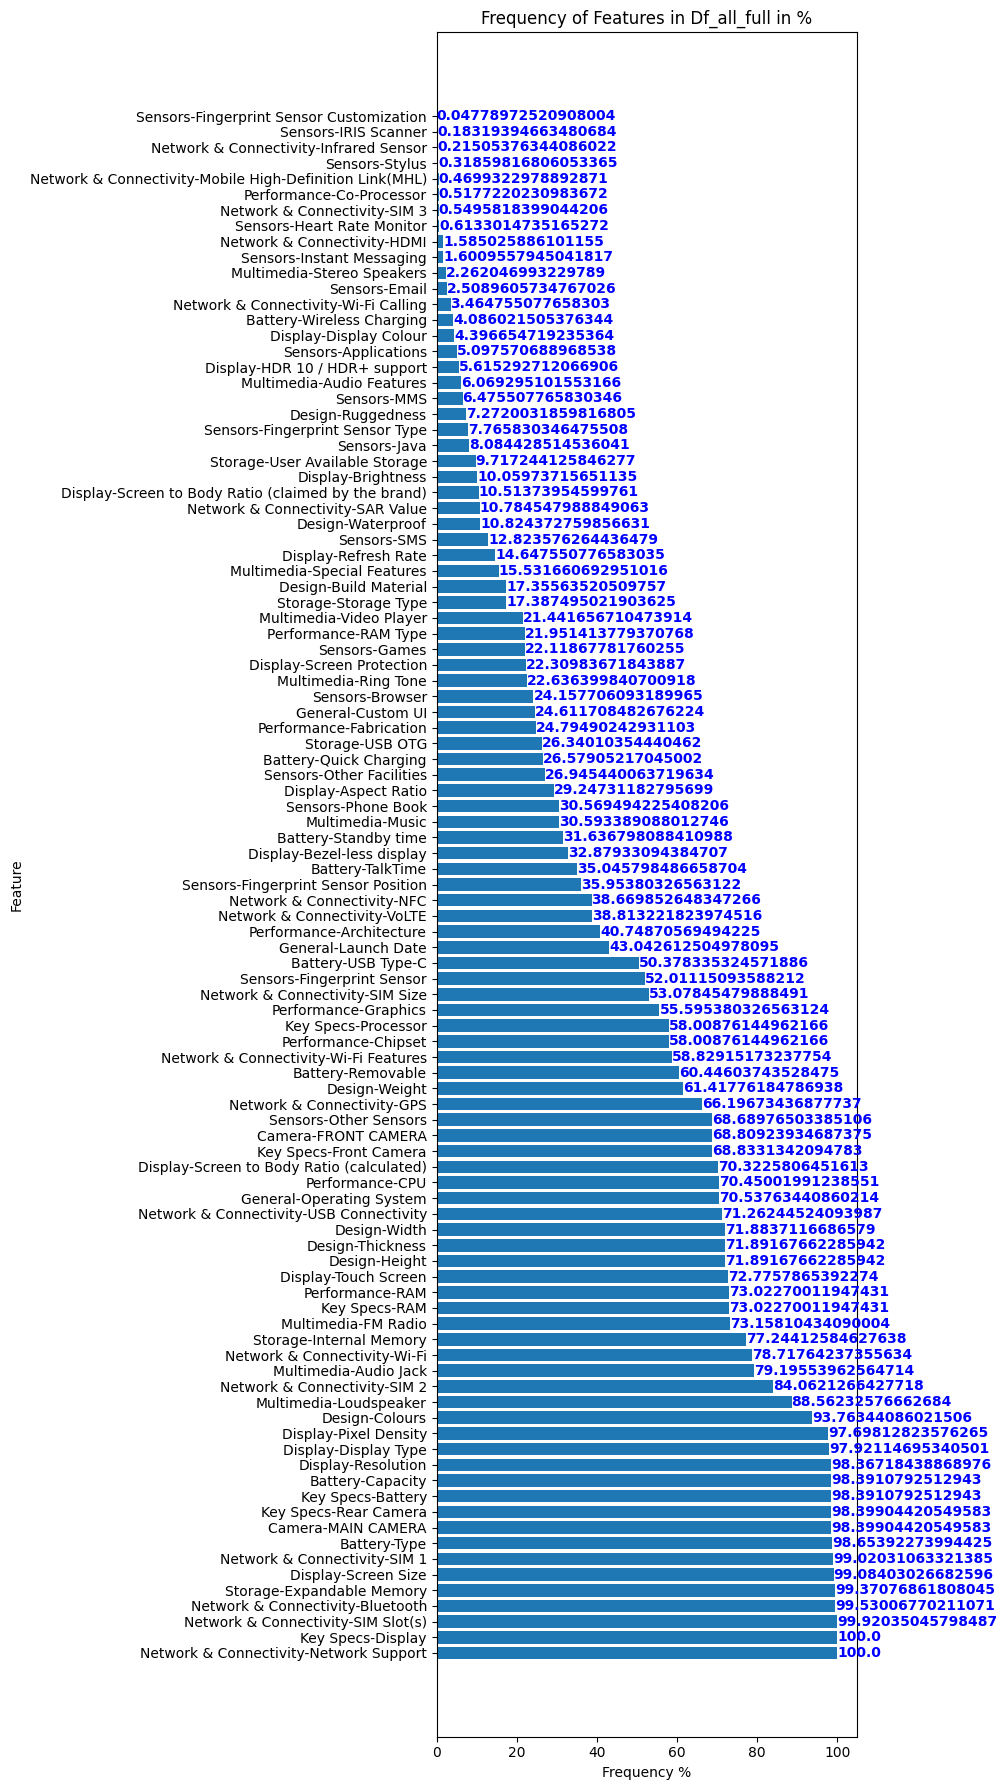

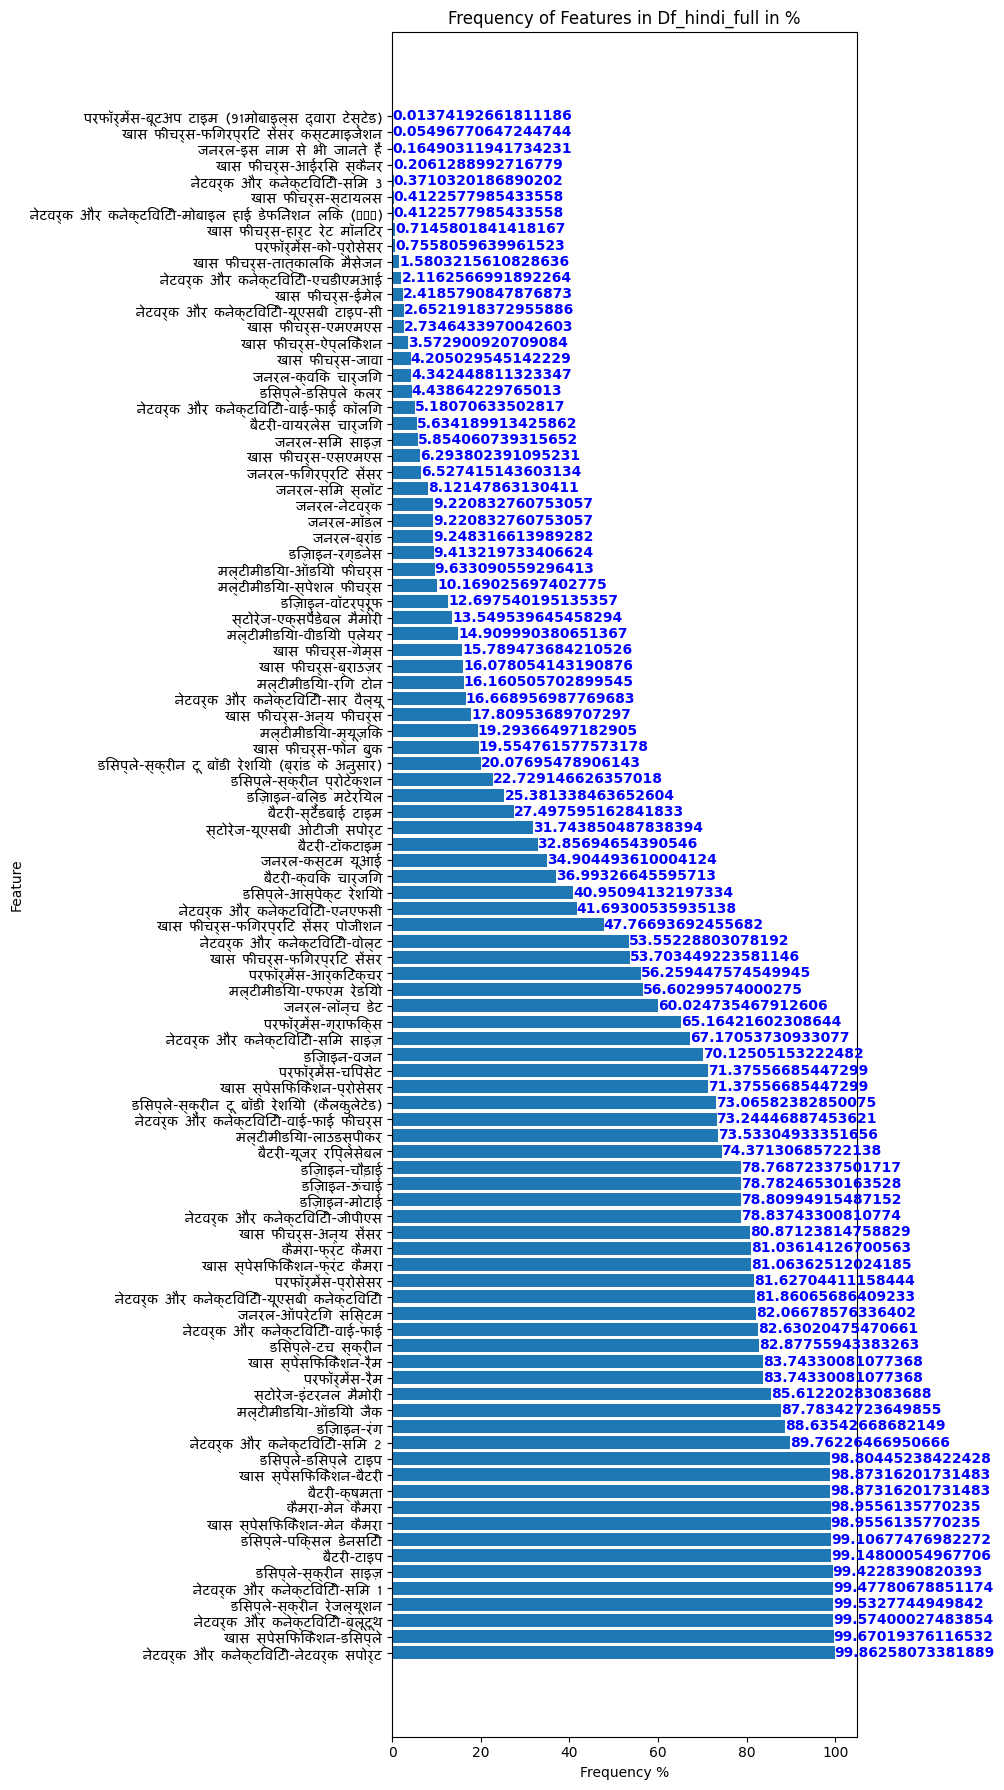

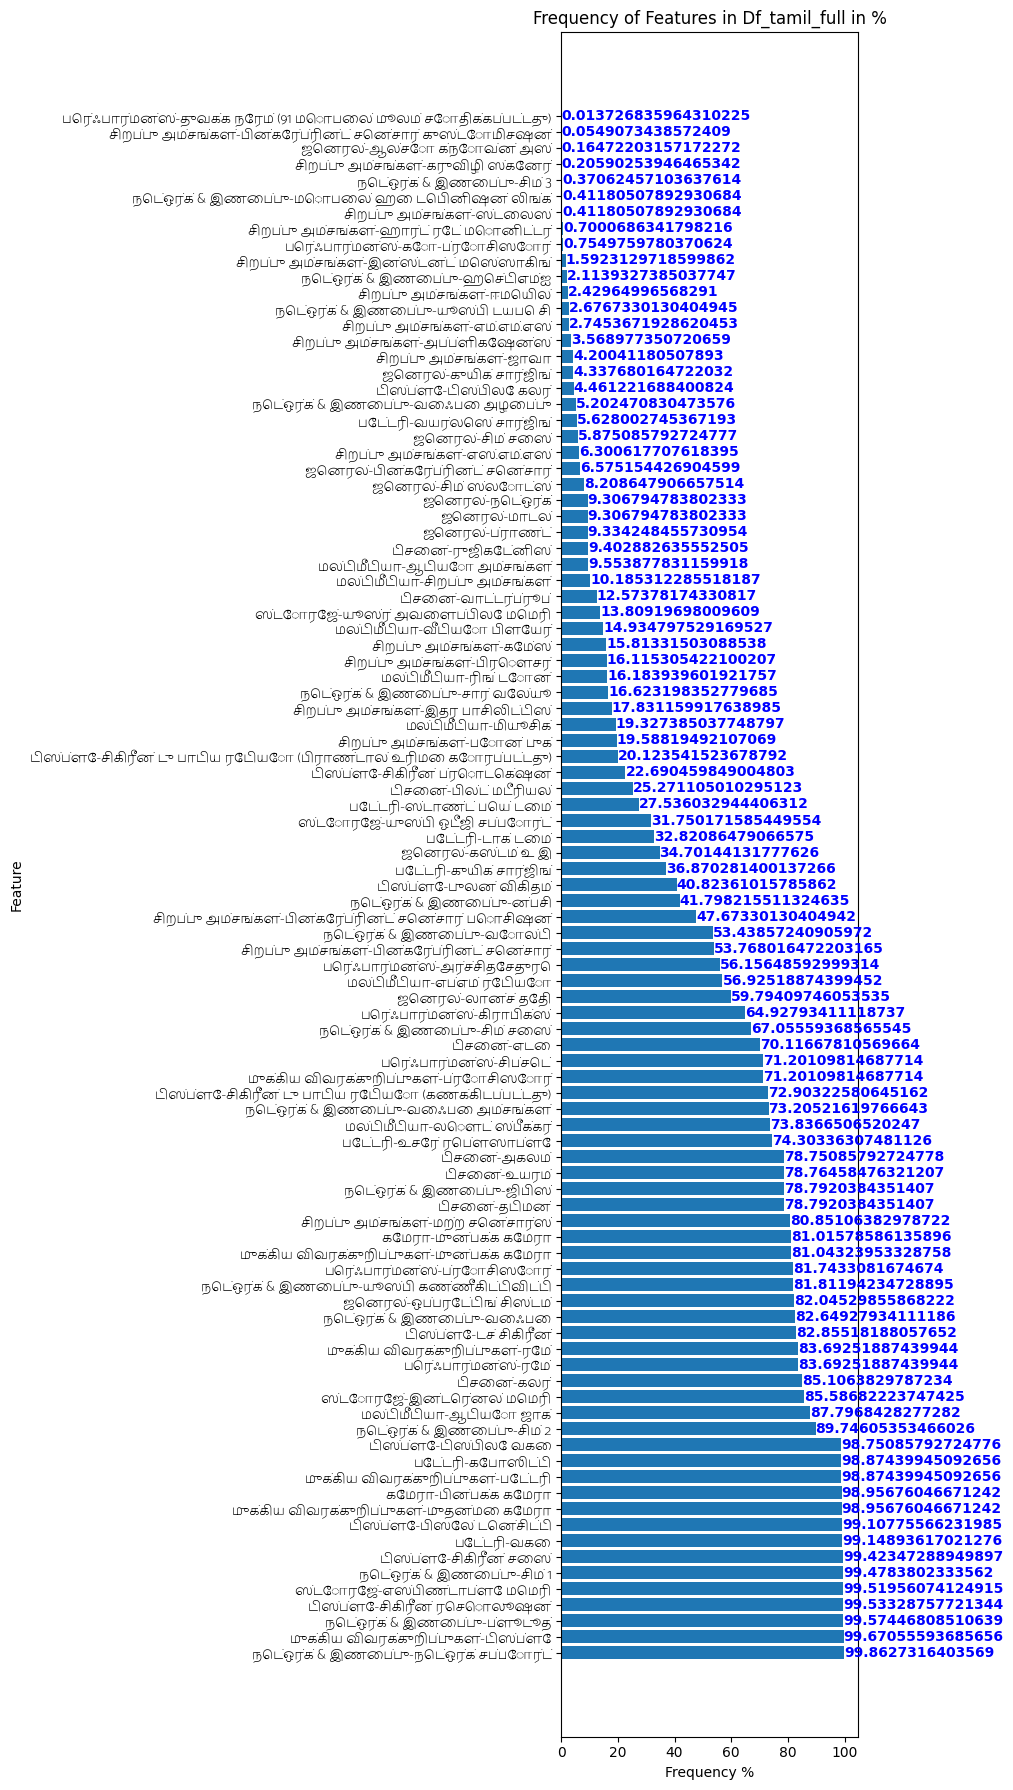

In [18]:
x = "Frequency %"
plt_all_full_freq = ploting(Df_all_full, x, 'Frequency of Features in Df_all_full in %', _Font = 'DejaVuSans', siz=18)
plt_hindi_full_freq = ploting(Df_hindi_full, x, 'Frequency of Features in Df_hindi_full in %', _Font = 'Mangal', siz=18)
plt_tamil_full_freq = ploting(Df_tamil_full, x, 'Frequency of Features in Df_tamil_full in %', _Font = 'Catamaran', siz=18)

In [19]:
import os

# Create the directory if it doesn't exist
if not os.path.exists("./metrics"):
    os.makedirs("./metrics")

# Save the dataframes as CSV files
Df_all.to_csv("./data/metrics/Df_all.csv", index=False)
Df_hindi.to_csv("./data/metrics/Df_hindi.csv", index=False)
Df_tamil.to_csv("./data/metrics/Df_tamil.csv", index=False)
Df_all_full.to_csv("./data/metrics/Df_all_full.csv", index=False)
Df_hindi_full.to_csv("./data/metrics/Df_hindi_full.csv", index=False)
Df_tamil_full.to_csv("./data/metrics/Df_tamil_full.csv", index=False)

# Save the plots as PNG files
plt_all[0].savefig("./data/metrics/plt_all.png", dpi=300)
plt_hindi[0].savefig("./data/metrics/plt_hindi.png", dpi=300)
plt_tamil[0].savefig("./data/metrics/plt_tamil.png", dpi=300)
plt_all_freq[0].savefig("./data/metrics/plt_all_freq.png", dpi=300)
plt_hindi_freq[0].savefig("./data/metrics/plt_hindi_freq.png", dpi=300)
plt_tamil_freq[0].savefig("./data/metrics/plt_tamil_freq.png", dpi=300)
plt_all_tot[0].savefig("./data/metrics/plt_all_tot.png", dpi=300)
plt_hindi_tot[0].savefig("./data/metrics/plt_hindi_tot.png", dpi=300)
plt_tamil_tot[0].savefig("./data/metrics/plt_tamil_tot.png", dpi=300)
plt_all_full_freq[0].savefig("./data/metrics/plt_all_full_freq.png", dpi=300)
plt_hindi_full_freq[0].savefig("./data/metrics/plt_hindi_full_freq.png", dpi=300)
plt_tamil_full_freq[0].savefig("./data/metrics/plt_tamil_full_freq.png", dpi=300)


C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\3151322484.py:17: UserWarning: Glyph 108 (l) missing from current font.
  plt_hindi[0].savefig("./data/metrics/plt_hindi.png", dpi=300)
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\3151322484.py:17: UserWarning: Glyph 112 (p) missing from current font.
  plt_hindi[0].savefig("./data/metrics/plt_hindi.png", dpi=300)
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\3151322484.py:20: UserWarning: Glyph 108 (l) missing from current font.
  plt_hindi_freq[0].savefig("./data/metrics/plt_hindi_freq.png", dpi=300)
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\3151322484.py:20: UserWarning: Glyph 112 (p) missing from current font.
  plt_hindi_freq[0].savefig("./data/metrics/plt_hindi_freq.png", dpi=300)
C:\Users\lagg1\AppData\Local\Temp\ipykernel_18336\3151322484.py:23: UserWarning: Glyph 108 (l) missing from current font.
  plt_hindi_tot[0].savefig("./data/metrics/plt_hindi_tot.png", dpi=300)
C:\Users\lagg1\AppData\Local\Temp\ipykerne